In [1]:
import os
%matplotlib inline
from matplotlib import pyplot as plt
import math
import numpy as np


import matplotlib
matplotlib.rc('font', **{
'family': 'DejaVu Sans',
'weight': 'normal'
})

In [89]:
def distance(p0, p1):
    return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2 + (p0[2] - p1[2])**2)
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    angle = np.arccos(np.dot(v1_u, v2_u))
    if np.isnan(angle):
        if (v1_u == v2_u).all():
            return 0.0
        else:
            return np.pi
    return angle


In [3]:
os.chdir("/home/domain/data/kirill/AB/XOP/docking/lom_results/a5RY33Lprf0_3_newrel_10_99_em_nvt24_fixed/")

In [90]:
for d in os.walk("/home/domain/data/kirill/AB/XOP/docking/lom_results/"):
    dirs = d[1]
    break
dirs

['a21wt_fixed',
 'a5RY33Lprf0_3_newrel_10_99_em_nvt24_fixed',
 'a5RY33Lprf0_3rel_32_82_em_nvt7_fixed',
 'a5RY33Lprf0_3rel_59_92_em_nvt37_fixed',
 'a5RY33Lprf0_3rel_8_22_em_nvt33_fixed',
 'a5RY33Lprf12_3_newrel_35_55_em_nvt22_fixed',
 'a5RY33Lprf12_3_newrel_35_78_em_nvt24_fixed',
 'a5RY33Lprf12_3_newrel_39_39_em_nvt28_fixed',
 'a5RY33Lprf12_3_newrel_8_34_em_nvt13_fixed',
 'a5RY33Lprf12_3rel_41_13_em_nvt1_fixed',
 'a5RY33Lprf12_3rel_57_60_em_nvt_fixed',
 'a5RY33Lprf12_3rel_61_55_em_nvt8_fixed',
 'a5RY33Lprf12_3rel_68_41_em_nvt10_fixed',
 'a5RY33Lprf1_2rel_42_97_em_nvt29_fixed',
 'a5RY33Lprf9_newrel_10_10_em_nvt22_fixed',
 'a5RY33Lprf9_newrel_4_33_em_nvt9_fixed',
 'a5RY33Lprf9_newrel_60_11_em_nvt2_fixed',
 'a5RY33Lprf9rel_1_12_em_nvt15_fixed',
 'a5RY33Lprf9rel_17_86_em_nvt2_fixed',
 'a5RY33Lprf9rel_2_73_em_nvt10_fixed',
 'a5RY33Lprf9rel_31_25_em_nvt9_fixed',
 'a5RY33Lprf9rel_33_5_em_nvt39_fixed',
 'a5RY33Lprf9rel_34_41_em_nvt40_fixed',
 'a5RY33Lprf9rel_34_52_em_nvt12_fixed',
 'a5RY33Lprf9

In [147]:
modelsR[i]

IndexError: list index out of range

In [150]:
modelsS

[['S10.pdbqt', '7', 8.53289780789621, 151.17252162120303],
 ['S76.pdbqt', '7', 8.569341398263928, 152.48505863114454],
 ['S72.pdbqt', '8', 8.550577699781462, 154.03305239690309],
 ['S26.pdbqt', '7', 8.503761344252318, 151.74317500493683],
 ['S22.pdbqt', '9', 8.53756270840806, 152.03431372424438],
 ['S64.pdbqt', '6', 8.58855174054392, 151.27404948212723],
 ['S71.pdbqt', '8', 8.562860853710049, 153.69568418731737],
 ['S15.pdbqt', '8', 8.536064081296484, 151.63373207090166],
 ['S74.pdbqt', '9', 8.499512574259773, 154.69508941254355],
 ['S67.pdbqt', '7', 8.544408990679226, 152.34892062792088],
 ['S6.pdbqt', '8', 8.57437863637943, 150.67680750815566],
 ['S44.pdbqt', '8', 8.48222688920781, 154.9296324101046],
 ['S11.pdbqt', '9', 8.602144500065084, 152.7705305586633],
 ['S50.pdbqt', '8', 8.499214434287442, 152.21959584323574],
 ['S28.pdbqt', '6', 8.578149567360082, 151.57934219465022],
 ['S69.pdbqt', '7', 8.51849523096656, 152.33295441124116],
 ['S99.pdbqt', '6', 8.535531676468667, 151.408962

/home/domain/data/kirill/AB/XOP/docking/lom_results/a5wt
a5wt 0.0


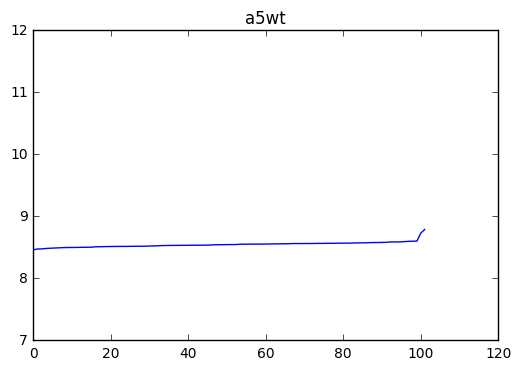

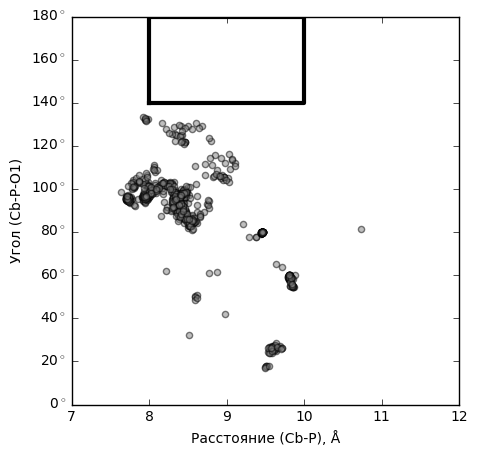

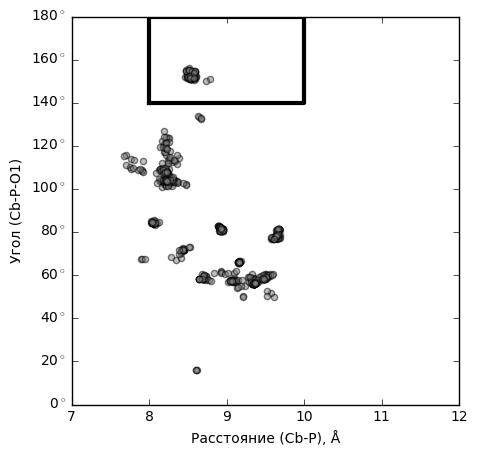

total mutants 1


In [152]:

bestR = []
bestS = []
MAX_DIST = 10
MIN_DIST = 8
MAX_ANG = 140
ATOM = "CB"
PROTEIN = "a5wt"
h=0
for dr in dirs:
    if PROTEIN not in dr:
        continue
    title = dr
    dr = "/home/domain/data/kirill/AB/XOP/docking/lom_results/" + dr
    os.chdir(dr)
    print dr
    files = [a for a in os.listdir(dr) if "pdbqt" in a and not PROTEIN in a] # get the docked ligand
    base = [a for a in os.listdir(dr) if PROTEIN in a] # get the receptor proteins
    if len(base) > 0:
        base=base[0]
    else: print base
    if len(base) == 0:
        print dr
        continue
    h+=1

    with open(base) as f: # read the coordinates of the protein
        lines = f.readlines()
#    print f
    for l in lines:

        if " TYR " in l and " 33 " in l and " L " in l and ATOM in l:
            line = l.split()
            sss =  line
            OH = float(line[6]), float(line[7]), float(line[8])
            
    anglesS = []
    distancesS = []  
    anglesR = []
    distancesR = []  
    distS = []
    distR = []
    modelsR = []
    modelsS = []
    for fle in files: # iterate over docking output files

        with open(fle) as f:
             lines = f.readlines()
        num = fle[1:-6]
        ss = fle[0]

        for l in lines: # itrerate over models in docked ligand
            if "MODEL" in l:
                model = l.split()[-1]
            if "ATOM" in l:
                if " P " in l:
                    line = l.split()
                    P = float(line[5]), float(line[6]), float(line[7])
                    dst = distance(P,OH)
                if " O1 " in l:
                    line = l.split()
                    x,y,z = float(line[5]), float(line[6]), float(line[7])
                    O1 = (x,y,z)
                    OH_P = np.subtract(OH, P)
                    P_O1 = np.subtract(O1, P)
                    ang_OH_P_O1 = 180 / math.pi * angle(OH_P, P_O1)
                    # data for 2d plots
                    if ss == "S":
                        anglesS.append(ang_OH_P_O1)
                        distancesS.append(dst)
                    if ss == "R":
                        anglesR.append(ang_OH_P_O1)
                        distancesR.append(dst)
                        
                    if dst > MAX_DIST or dst < MIN_DIST or ang_OH_P_O1 < MAX_ANG:               
                        continue   
#                     print O1, P, OH
#                     print ang_OH_P_O1
                    # data for 1d plots
                    if ss == "S":
                        distS.append(dst)
                        modelsS.append([fle, model,dst,ang_OH_P_O1])
                        
                    if ss == "R":
                        modelsR.append([fle, model,dst,ang_OH_P_O1])
                        distR.append(dst)
    
    if len(distR) == 0:
        if len(distS) == 0:
            distS = [1]
            
      #  i = distR.index(min(distR))
        print title + " " + str(round(len(distR)/float(len(distS)),2))
        #print "R/S ratio: " + str(len(distR)/float(len(distS)))
   
        
     #   bestR.append([dr + "/" + modelsR[i][0],modelsR[i][1],])
      #  bestS.append([dr + "/" + modelsS[i][0],modelsS[i][1],])
        plt.plot(sorted(distS))
        plt.plot(sorted(distR))

        plt.ylim(7,12)
        plt.title(title)
        plt.show()    
       
    
        fig, ax = plt.subplots(figsize=(5,5))
        plt.scatter(distancesR, anglesR, c='grey', alpha=0.5)

        plt.ylim(0,180)
        plt.xlim(7,12)
        plt.xlabel(ur"Расстояние (Cb-P), \u00c5")
        plt.ylabel(u"Угол (Cb-P-O1)")
        ax.set_yticklabels([str(a)+u"$^\circ$" for a in range(0,181,20)])
       # plt.title(u"Результаты докинга R ХОР")
        plt.plot([8,8,8,10,10,10,10,8],[140,180,180,180,180,140,140,140], color="black", linewidth=3)
        plt.show()
            
        fig, ax = plt.subplots(figsize=(5,5))
        plt.scatter(distancesS, anglesS, c='grey', alpha=0.5)
        plt.ylim(0,180)
        plt.xlim(7,12)
        plt.xlabel(ur"Расстояние (Cb-P), \u00c5")
        plt.ylabel(u"Угол (Cb-P-O1)")
        ax.set_yticklabels([str(a)+u"$^\circ$" for a in range(0,181,20)])
       # plt.title(u"Результаты докинга S ХОР")
        plt.plot([8,8,8,10,10,10,10,8],[140,180,180,180,180,140,140,140], color="black", linewidth=3)
        plt.show()
    else:
        pass
    #    print dr + " did not dock into reaction favorable pose"
print "total mutants " + str(h)

In [137]:
P =  (25.152, -4.983, 18.145)
OH =  (25.406, -12.766, 20.037)
O1 =(23.827, -4.913, 17.425)

In [140]:
O1, OH_P, P_O1 = (x,y,z), np.subtract(OH, P), np.subtract(O1, P)
ang_OH_P_O1 = 180 / math.pi * angle(OH_P, P_O1)

In [141]:
ang_OH_P_O1

100.68788984519871

In [98]:
len(files)

202

In [62]:
best

[]

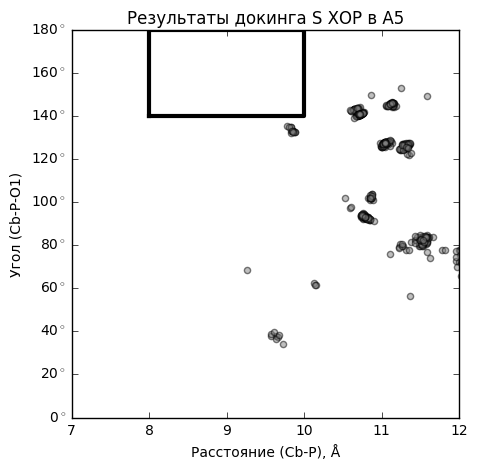

In [107]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(distances, angles, c='grey', alpha=0.5)
plt.ylim(0,180)
plt.xlim(7,12)
plt.xlabel(ur"Расстояние (Cb-P), \u00c5")
plt.ylabel(u"Угол (Cb-P-O1)")
ax.set_yticklabels([str(a)+u"$^\circ$" for a in range(0,181,20)])
plt.title(u"Результаты докинга S ХОР в А5")
plt.plot([8,8,8,10,10,10,10,8],[140,180,180,180,180,140,140,140], color="black", linewidth=3)


In [ ]:
### qmmm results analysis

In [86]:
mean_ens = []


with open("/home/domain/data/kirill/AB/XOP/qmmm/mutants_after_docking/R/qmmm_results.dat") as f:
    ls = f.readlines()

for l in ls:
    l = l.split(",")
    e = float(l[1])
    if e > 100:
        mean_ens.append(e)

(array([ 2.,  0.,  2.,  2.,  1.,  0.,  1.,  0.,  1.,  1.]),
 array([ 131. ,  134.8,  138.6,  142.4,  146.2,  150. ,  153.8,  157.6,
         161.4,  165.2,  169. ]),
 <a list of 10 Patch objects>)

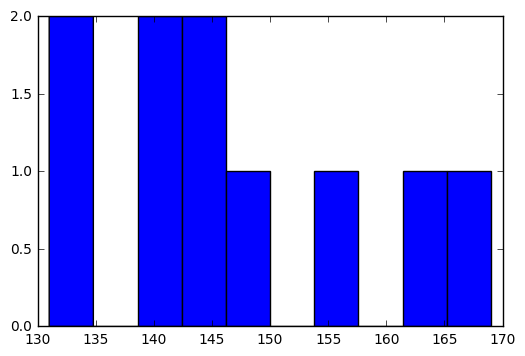

In [88]:
plt.hist(x=mean_ens)